##Integrantes:
- Matheus de S. Santos Rm566901
- Ricardo José Amorin
- Klaus Lohany Barbosa de Oliveira
- Victor Oliveira Fedeli Tate
- Paulo Roberto Silva Amaral Ribeiro Junior

##IMPORTANDO AS BIBLIOTECAS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

##IMPORTANDO DADOS

In [2]:
df = pd.read_csv("Atividade_Cap10_produtos_agricolas.csv")

##PRINTANDO AS PRIMEIRAS LINHAS DA TABELA

In [3]:
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


##ANALISANDO OS DADOS - quantidade de linhas,quantidade de colunas e tipos dos dados de cada parametro.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


foi observado que não existem dados faltantes

##CONFERIR SE EXISTEM DADOS DUPLICADOS

In [5]:
duplicados = df.duplicated().sum()
print("Quantidade de numeros duplicados", duplicados)

Quantidade de numeros duplicados 0


##VERIFICAR A EXISTENCIA DE OUTLIER

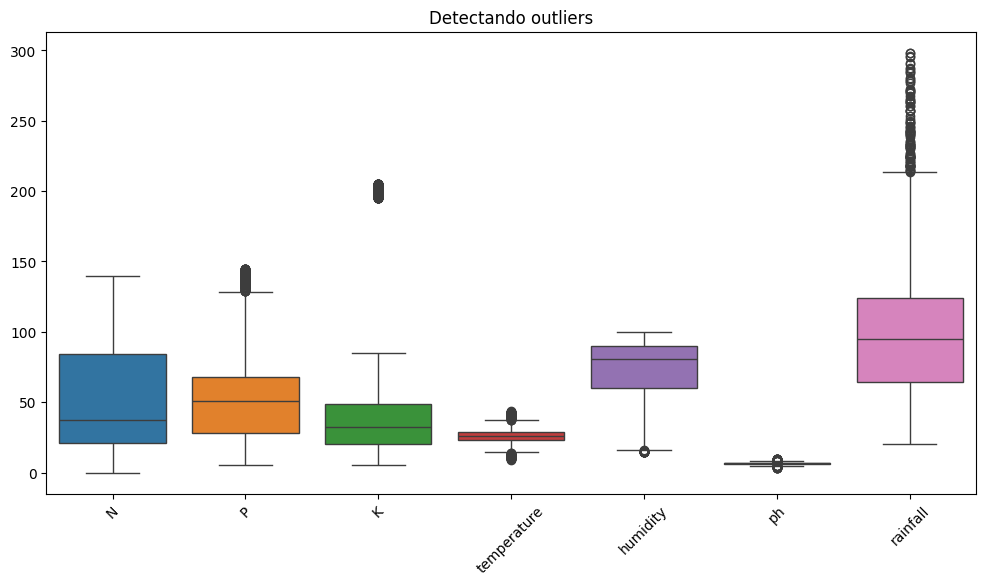

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Detectando outliers")
plt.xticks(rotation=45)
plt.show()

Foi observado muitos outliers entre os dados

##SUBSTITUINDO OS OUTLIERS PELA MEDIA DAS COLUNAS

In [7]:
df = pd.DataFrame(df)

# 2. Função para substituir outliers pela média da coluna
def substituir_outliers_por_media(df):
    # Faz uma cópia do DataFrame original para não alterar os dados originais
    df_corrigido = df.copy()

    # Itera por cada coluna numérica do DataFrame
    for coluna in df_corrigido.select_dtypes(include='number').columns:
        # Calcula os quartis
        Q1 = df_corrigido[coluna].quantile(0.25)  # Primeiro quartil (25%)
        Q3 = df_corrigido[coluna].quantile(0.75)  # Terceiro quartil (75%)
        IQR = Q3 - Q1                             # Intervalo interquartil

        # Define os limites para detectar outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Calcula a média da coluna
        media = df_corrigido[coluna].mean()

        # Substitui valores fora dos limites pela média
        df_corrigido[coluna] = df_corrigido[coluna].apply(
            lambda x: media if x < limite_inferior or x > limite_superior else x
        )

    # Retorna o DataFrame corrigido
    return df_corrigido

# 3. Aplicando a função ao DataFrame
df_corrigido = substituir_outliers_por_media(df)

# 4. Exibindo os resultados
print("DataFrame original:")
print(df)
print("\nDataFrame com outliers substituídos pela média:")
print(df_corrigido)

DataFrame original:
        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

DataFrame com outliers substituídos pela média:
        N     P     K  temperature   humid

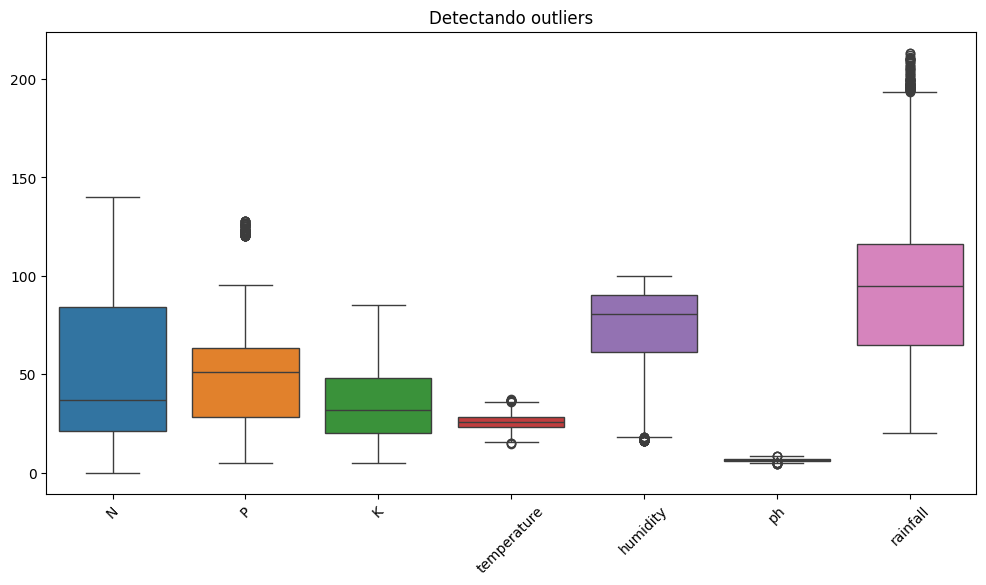

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_corrigido)
plt.title("Detectando outliers")
plt.xticks(rotation=45)
plt.show()

Após substituir os outliers pela media da coluna, podemos observar que mesmo tendo melhorado, ainda existem alguns longe dos pontos de apoio

##REMOVENDO OUTLIERS

#removendo o minimo de linhas mantendo apenas outliers apoiados nos limites para menor perca de linhas

In [9]:
df = pd.DataFrame(df_corrigido)

# Função para remover outliers usando IQR
def remover_outliers_iqr(df):
    df_limpo = df.copy() # Cria uma cópia do DataFrame original para não alterar os dados originais
    for coluna in df_limpo.select_dtypes(include='number').columns:
        Q1 = df_limpo[coluna].quantile(0.25) #primeiro quartil 25%
        Q3 = df_limpo[coluna].quantile(0.75)  #terceiro quartil 75%
        IQR = Q3 - Q1     #intervalo interquartil
        limite_inferior = Q1 - 1.5 * IQR  #limite admitido inferior do grafico
        limite_superior = Q3 + 1.5 * IQR   #limite admitido superior
        df_limpo = df_limpo[(df_limpo[coluna] >= limite_inferior) & (df_limpo[coluna] <= limite_superior)]  #mantem valores dentro dos limites
    return df_limpo

# Aplicar a função
df_tratado = remover_outliers_iqr(df)

print("DataFrame sem outliers:")
print(df_tratado)


DataFrame sem outliers:
        N     P     K  temperature   humidity        ph    rainfall   label
1      85  58.0  41.0    21.770462  80.319644  7.038096  103.463655    rice
2      60  55.0  44.0    23.004459  82.320763  7.840207  103.463655    rice
3      74  35.0  40.0    26.491096  80.158363  6.980401  103.463655    rice
4      78  42.0  42.0    20.130175  81.604873  7.628473  103.463655    rice
5      69  37.0  42.0    23.058049  83.370118  7.073454  103.463655    rice
...   ...   ...   ...          ...        ...       ...         ...     ...
2195  107  34.0  32.0    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15.0  27.0    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33.0  30.0    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32.0  34.0    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18.0  30.0    23.603016  60.396475  6.779833  140.937041  coffee

[2029 rows x 8 columns]


#Grafico após dados tratados, com menor tolerancia de outliers

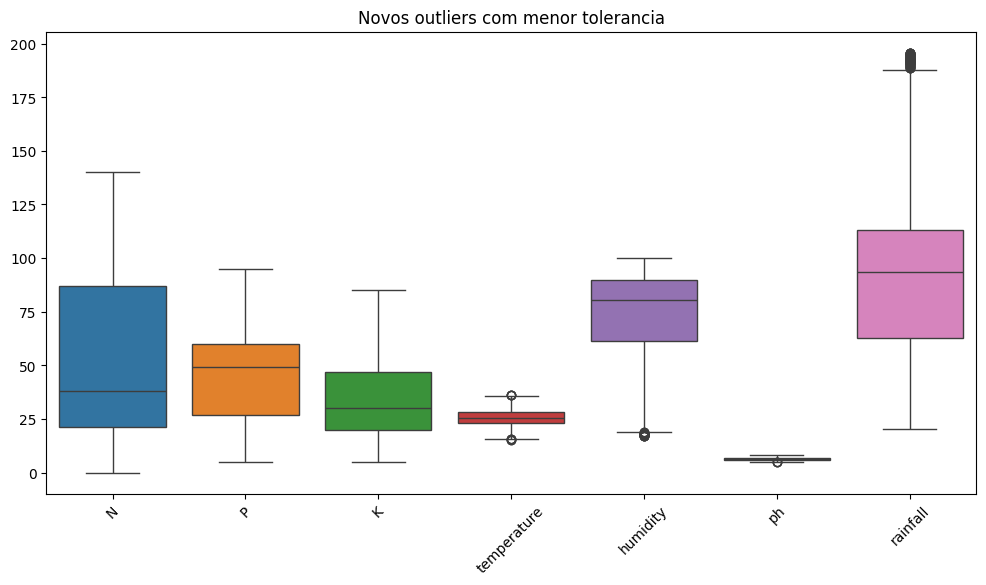

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_tratado)
plt.title("Novos outliers com menor tolerancia")
plt.xticks(rotation=45)
plt.xticks(rotation=45)
plt.show()

Após remover os outliers que permaneceram mesmo após tratados, observamos que a situação melhorou bastante e as linhas tiveram uma queda menor que 10% em relação a quantidade de linhas originais da tabela.
Indo de 2200 linhas para 2029 linhas.

##GRAFICO PIZZA DA PORCENTAGEM DE CADA LABEL APÓS DADOS TRATADOS

label
maize          100
kidneybeans    100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
banana         100
watermelon     100
cotton         100
muskmelon      100
orange          98
mango           96
coffee          96
mothbeans       95
jute            92
coconut         86
pigeonpeas      86
rice            85
papaya          83
chickpea        76
apple           70
grapes          66
Name: count, dtype: int64
Quantidade de labels diferentes: 22


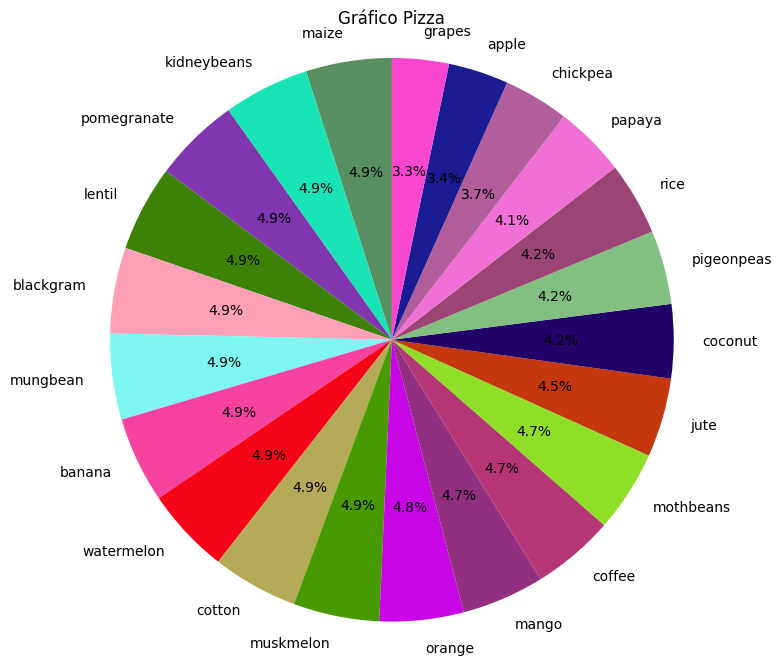

In [11]:

# Contagem dos labels
contagem = df_tratado['label'].value_counts()
print(contagem)

# Quantidade de labels diferentes
num_labels_unicos = df_tratado['label'].nunique()
print(f"Quantidade de labels diferentes: {num_labels_unicos}")

# Preparando dados para o gráfico
ids = contagem.index.tolist()       # Labels únicos
valores = contagem.values.tolist()  # Quantidade de cada label

# Gerando cores aleatórias (RGB)
cores = [(np.random.rand(), np.random.rand(), np.random.rand()) for _ in range(num_labels_unicos)]

# Criando gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=ids, colors=cores, autopct='%1.1f%%', startangle=90)
plt.title('Gráfico Pizza')
plt.axis('equal')  # Mantém formato circular
plt.show()



#Após tradados os dados, alguns tipos de cultivos tiveram mais dados removidos que outros resultando em 3 cultivos que representam menos ded 4% cada , dos cultivos totais tratados

#DISTRIBUIÇÃO DOS LABELS

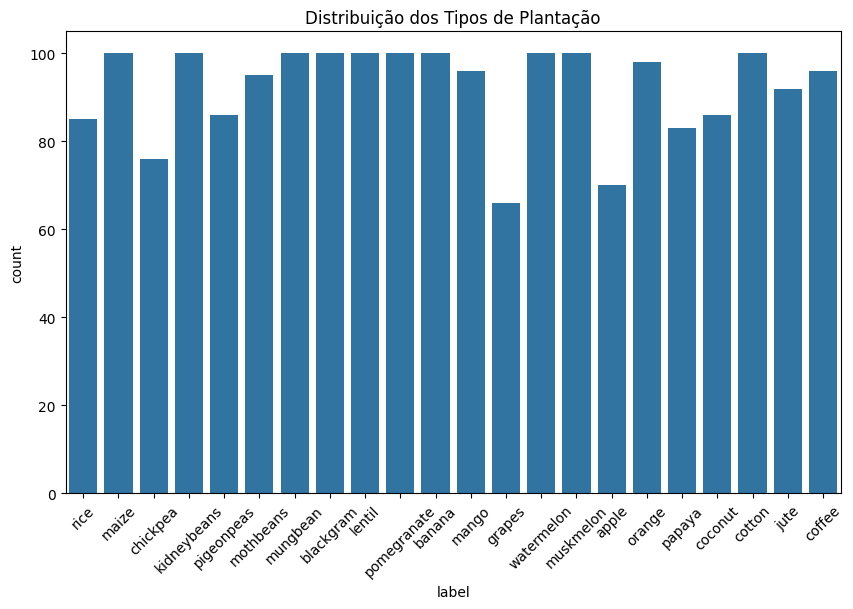

In [12]:
# Exploração da distribuição dos labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df_tratado)
plt.title("Distribuição dos Tipos de Plantação")
plt.xticks(rotation=45)
plt.show()

#Fica claro que alguns tipos de cultivo terão mais dados para serem usados para treino do que outros devido a quantidade de linhas disponivel.

##CORRELAÇÃO ENTRE AS FEATURES NUMERICAS

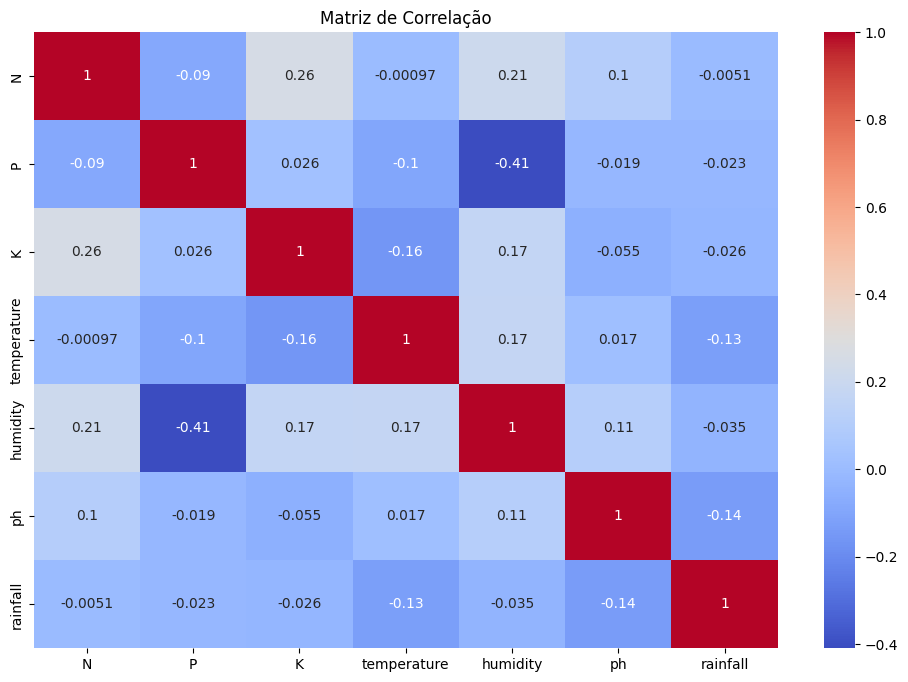

In [13]:
# Correlação entre as features numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df_tratado.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

podemos observar que existe pouca correlação entre os dados

##ANALISANDO 3 TIPOS DE PLANTAÇÂO EM RELAÇÂO AOS OUTROS DADOS

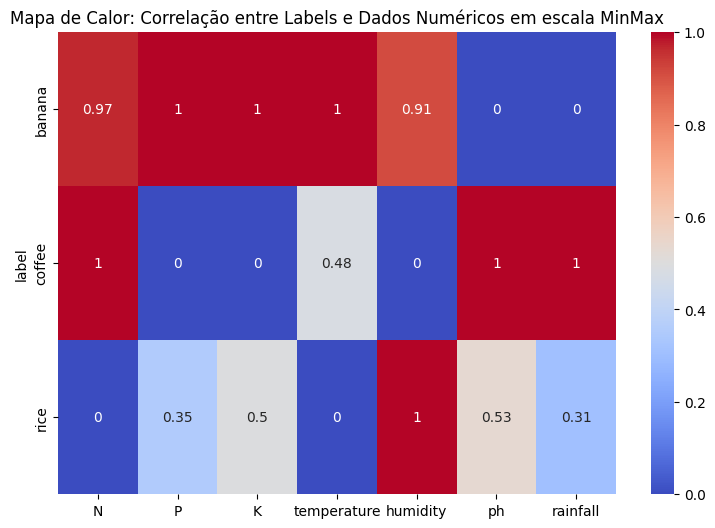

<Figure size 1000x600 with 0 Axes>

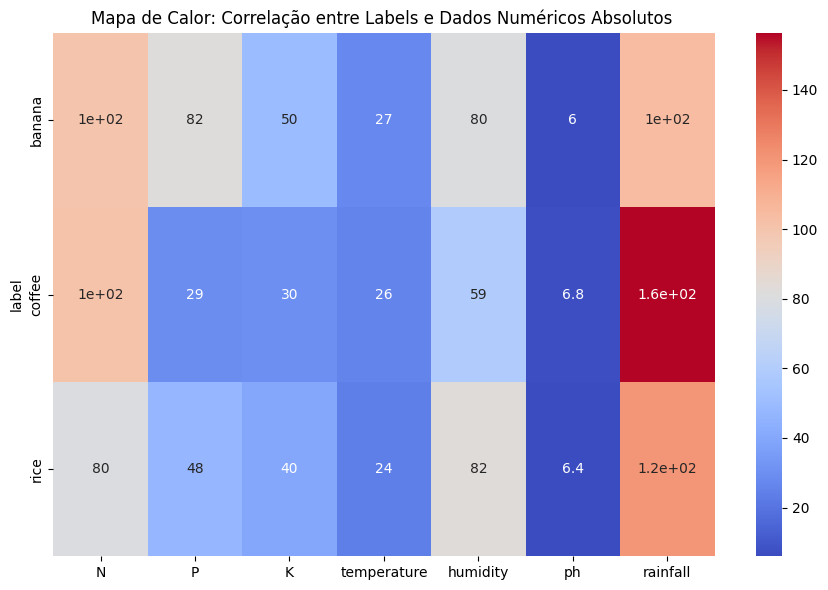

In [14]:



data = df_tratado

df_tratado = pd.DataFrame(data)

# Escolher os 3 labels que você quer analisar
labels_selecionados = ['rice', 'coffee', 'banana']

# Filtrar apenas esses labels
df_filtrado = df_tratado[df_tratado['label'].isin(labels_selecionados)]

#Agrupar por label e calcular a média das colunas numéricas
df_agrupado = df_filtrado.groupby('label').mean(numeric_only=True)

# Normalizar com Min-Max Scaling
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(
    scaler.fit_transform(df_agrupado),
    index=df_agrupado.index,
    columns=df_agrupado.columns)



#Gerar mapa de calor
plt.figure(figsize=(9, 6))
sns.heatmap(df_normalizado, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor: Correlação entre Labels e Dados Numéricos em escala MinMax")
plt.show()
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 6))
sns.heatmap(df_agrupado, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor: Correlação entre Labels e Dados Numéricos Absolutos ")
plt.tight_layout()
plt.show()

Observamos que a banana tem uma correlação maior com NPK , temperatura e uma correlação grande tambem com a umidade  , enquanto o café tem uma correlação maior com PH e Chuva , o arroz por sua vez tem uma correlação menor com esses itens,porem tem a maior correlação com a umidade do solo

##ANALISE E TRATAMENTO DOS DADOS DOS CULTIVOS DE CAFÉ, ARROZ E BANANA

In [15]:
data = df_tratado

df_tratado = pd.DataFrame(data)

# Escolher os 3 labels (cultivos)
labels_selecionados = ['rice', 'coffee', 'banana']


df_filtrado = df_tratado[df_tratado['label'].isin(labels_selecionados)]  #filtrando os 3 tipos de cultivo
df_agrupado = df_filtrado.groupby('label').mean(numeric_only=True)      #agrupando pelas medias

##Tratando cada dado em datas frames individualmente

ph_minimo_medio = df_agrupado['ph'].min()        #ph minimo dentre os valores medios de ph dos 3 cultivos
ph_maxima_medio = df_agrupado['ph'].max()        #ph maximo dentre os valores medios de ph dos 3 cultivos

chuva_minimo_media = df_agrupado['rainfall'].min()      #chuva minima dentre os valores medios de ph dos 3 cultivos
chuva_maxima_media = df_agrupado['rainfall'].max()      #chuva maxima dentre os valores medios de ph dos 3 cultivos

ph_min_total =df_filtrado['ph'].min()           #valor minimo encontrado de PH encontrado em todos os dados de cada um dos 3 cultivos
ph_max_total =df_filtrado['ph'].max()           #valor maximo encontrado de PH encontrado em todos os dados de cada um dos 3 cultivos

#PH
min_por_label_ph= df_filtrado.groupby('label', as_index=False)['ph'].min()   #valores minimos de PH de cada um dos 3 cultivos
max_por_label_ph= df_filtrado.groupby('label', as_index=False)['ph'].max()    #valores maximos de PH de cada um dos 3 cultivos

#CHUVA
max_por_label_rainfall= df_filtrado.groupby('label', as_index=False)['rainfall'].max()  #valores maximos de chuva de cada um dos 3 cultivos
min_por_label_rainfall= df_filtrado.groupby('label', as_index=False)['rainfall'].min()  #valores minimos de chuva de cada um dos 3 cultivos

#N
max_por_label_n= df_filtrado.groupby('label', as_index=False)['N'].max()  #valores maximos de N de cada um dos 3 cultivos
min_por_label_n= df_filtrado.groupby('label', as_index=False)['N'].min()  #valores minimos de N de cada um dos 3 cultivos

#P
max_por_label_p= df_filtrado.groupby('label', as_index=False)['P'].max()  #valores maximos de P de cada um dos 3 cultivos
min_por_label_p= df_filtrado.groupby('label', as_index=False)['P'].min()  #valores minimos de P de cada um dos 3 cultivos

#K
max_por_label_k= df_filtrado.groupby('label', as_index=False)['K'].max()  #valores maximos de K de cada um dos 3 cultivos
min_por_label_k= df_filtrado.groupby('label', as_index=False)['K'].min()  #valores minimos de K de cada um dos 3 cultivos

# temperature
max_por_label_temperature= df_filtrado.groupby('label', as_index=False)['temperature'].max()  #valores maximos de temperature de cada um dos 3 cultivos
min_por_label_temperature= df_filtrado.groupby('label', as_index=False)['temperature'].min()  #valores minimos de temperature de cada um dos 3 cultivos

# humidity
max_por_label_humidity = df_filtrado.groupby('label', as_index=False)['humidity'].max()  #valores maximos de humidity de cada um dos 3 cultivos
min_por_label_humidity = df_filtrado.groupby('label', as_index=False)['humidity'].min()  #valores minimos de humidity  de cada um dos 3 cultivos




#print("Ph minimo observado de cada um dos 3 cultivos:\n", min_por_label_ph)
#print("Ph maximo observado de cada um dos 3 cultivos:\n", max_por_label_ph)


print(df_agrupado)







                 N        P          K  temperature   humidity        ph  \
label                                                                      
banana  100.230000  82.0100  50.050000    27.376798  80.358123  5.983893   
coffee  100.958333  28.9375  30.010417    25.524904  58.980313  6.790828   
rice     79.788235  47.6000  39.941176    23.807390  82.404155  6.415201   

          rainfall  
label               
banana  104.626980  
coffee  156.422803  
rice    120.467697  


Selecionando o cultivo de café , arroz e banana e agrupados seus dados, conseguimos observar quais os valores medios dos parametros que cada um dos plantios possue.
Tambem foi refinado em DataFrames diferentes os dados minimos e maximos dos parametros encontrados em cada um dos plantios.

##ANALISE DE LIMITES ACEITAVEIS E CONDIÇÃO IDEAL PARA O CULTIVO DOS 3 TIPOS DE ESPECIES SELECIONADAS

In [16]:


#analise PH
ph_max_minimo =min_por_label_ph['ph'].max()
ph_min_maximo =max_por_label_ph['ph'].min()

#analise Chuva
rainfall_max_minimo =min_por_label_rainfall['rainfall'].max()
rainfall_min_maximo =max_por_label_rainfall['rainfall'].min()

#N
n_max_minimo =min_por_label_n['N'].max()
n_min_maximo =max_por_label_n['N'].min()

#P
p_max_minimo =min_por_label_p['P'].max()
p_min_maximo =max_por_label_p['P'].min()

#K
k_max_minimo =min_por_label_k['K'].max()
k_min_maximo =max_por_label_k['K'].min()

#temperature
temperature_max_minimo =min_por_label_temperature['temperature'].max()
temperature_min_maximo =max_por_label_temperature['temperature'].min()

#humidity
humidity_max_minimo =min_por_label_humidity['humidity'].max()
humidity_min_maximo =max_por_label_humidity['humidity'].min()



print(f"Ph do solo para que possa ser plantado os 3 tipos de cultivo são entre {ph_max_minimo} - {ph_min_maximo}")

print(f"Chuva da região para que possa ser plantado os 3 tipos de cultivo é entre {rainfall_max_minimo} - {rainfall_min_maximo}")

print(f"N para que possa ser plantado os 3 tipos de cultivo é entre {n_max_minimo} - {n_min_maximo}")

print(f"P para que possa ser plantado os 3 tipos de cultivo é entre {p_max_minimo} - {p_min_maximo}")

print(f"K para que possa ser plantado os 3 tipos de cultivo é entre {k_max_minimo} - {k_min_maximo}")

print(f"Temperatura para que possa ser plantado os 3 tipos de cultivo é entre {temperature_max_minimo} - {temperature_min_maximo}")

print(f"Umidade para que possa ser plantado os 3 tipos de cultivo é entre {humidity_max_minimo} - {humidity_min_maximo}")


Ph do solo para que possa ser plantado os 3 tipos de cultivo são entre 6.020947179 - 6.490074429
Chuva da região para que possa ser plantado os 3 tipos de cultivo é entre 115.1564012 - 119.84797
N para que possa ser plantado os 3 tipos de cultivo é entre 80 - 99
P para que possa ser plantado os 3 tipos de cultivo é entre 70.0 - 40.0
K para que possa ser plantado os 3 tipos de cultivo é entre 45.0 - 35.0
Temperatura para que possa ser plantado os 3 tipos de cultivo é entre 25.01018457 - 26.92995077
Umidade para que possa ser plantado os 3 tipos de cultivo é entre 80.12267476 - 69.94807345


Atraves da seleção de dados conseguimos estabelecer os dados minimos e maximos que um mesmo solo possa plantar os 3 cultivos.
Foi levado em consideração o maior valor dentre os valores minimos encontrados para determinar o 'piso' dos parametros e usado o menor valor  dentre os valores maximos encontrados para determinar o 'teto' dos parametros para que possa ser plantado os 3 tipos de cultivo.


##ORGANIZAÇÂO DE DADOS EM UM DATAFRAME

In [17]:
#valores medios de intervalo
n_medio = (n_max_minimo + n_min_maximo)/2
p_medio = (p_max_minimo + p_min_maximo)/2
k_medio = (k_max_minimo + k_min_maximo)/2
temperature_medio = (temperature_max_minimo + temperature_min_maximo)/2
humidity_medio = (humidity_max_minimo + humidity_min_maximo)/2
ph_medio = (ph_max_minimo + ph_min_maximo)/2
rainfall_medio = (rainfall_max_minimo + rainfall_min_maximo)/2



parametro_minimos = {
    'Parametro':['N','P','K','temperature','humidity','ph','humidity'],
    'Valor Minimo':[n_max_minimo,p_max_minimo,k_max_minimo,temperature_max_minimo,humidity_max_minimo,ph_max_minimo,humidity_max_minimo],
    'Valor Maximo ':[n_min_maximo,p_min_maximo,k_min_maximo,temperature_min_maximo, humidity_min_maximo,ph_min_maximo,humidity_min_maximo],
    'Valores medios adequados':[n_medio,p_medio,k_medio,temperature_medio,humidity_medio,ph_medio,rainfall_medio]

}
df_parametros_minimos = pd.DataFrame(parametro_minimos)
print("Parametros minimos , maximos e ideais para que o solo e o clima comporte os 3 tipos cultivos:\n",df_parametros_minimos)


Parametros minimos , maximos e ideais para que o solo e o clima comporte os 3 tipos cultivos:
      Parametro  Valor Minimo  Valor Maximo   Valores medios adequados
0            N     80.000000      99.000000                 89.500000
1            P     70.000000      40.000000                 55.000000
2            K     45.000000      35.000000                 40.000000
3  temperature     25.010185      26.929951                 25.970068
4     humidity     80.122675      69.948073                 75.035374
5           ph      6.020947       6.490074                  6.255511
6     humidity     80.122675      69.948073                117.502186


É possivel observar valores em comum das 3 plantações e encontrar solos que sejam possiveis a plantação de ambas.
O dataframe demosntra os valores minimos e maximos toleraveis para um mesmo solo conseguir plantar os 3 cultivos, baseado nos dados fornecidos.
Mostra tambem um valor medio entre o valor minimo e maximo , sendo um valor aproximado do ideal para o plantio de ambos.

##Graficos para analise de cultivos e parametros

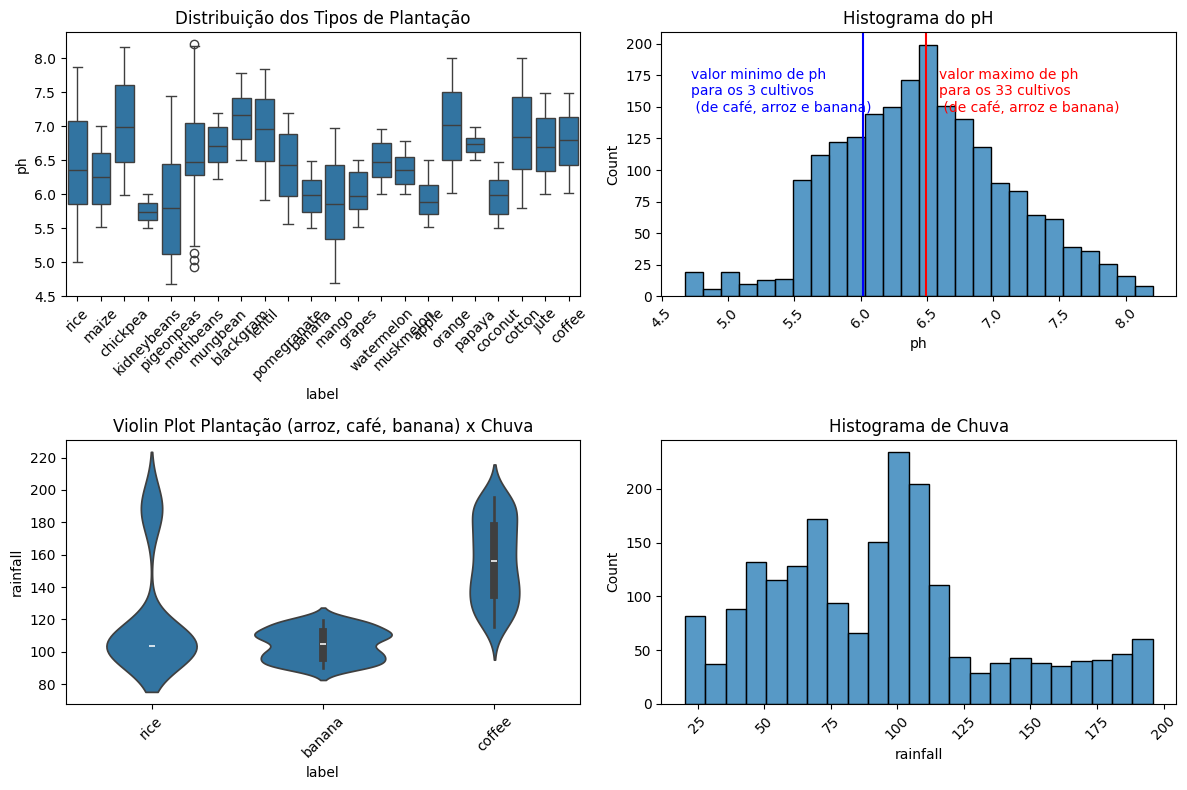

In [18]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flat

# Exemplo de gráficos
sns.boxplot(x='label', y='ph', data=df_tratado, ax=ax1)
ax1.set_title("Distribuição dos Tipos de Plantação")
ax1.tick_params(axis='x', rotation=45)

sns.histplot(data=df_tratado, x='ph', ax=ax2)
ax2.set_title("Histograma do pH")
ax2.tick_params(axis='x', rotation=45)
valor_referencia_ph_min = ph_max_minimo
ax2.axvline(valor_referencia_ph_min, color='b')
ax2.text(valor_referencia_ph_min - 1.3, ax2.get_ylim()[1]*0.7, "valor minimo de ph \npara os 3 cultivos \n (de café, arroz e banana)", color ='b')
valor_referencia_ph_max = ph_min_maximo
ax2.axvline(valor_referencia_ph_max, color='r')
ax2.text(valor_referencia_ph_max + 0.1, ax2.get_ylim()[1]*0.7, "valor maximo de ph \npara os 33 cultivos\n (de café, arroz e banana)", color ='r')



sns.violinplot(x='label', y='rainfall', data=df_filtrado, ax=ax3)
ax3.set_title("Violin Plot Plantação (arroz, café, banana) x Chuva")
ax3.tick_params(axis='x', rotation=45)

sns.histplot(data=df_tratado, x='rainfall', ax=ax4)
ax4.set_title("Histograma de Chuva")
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

O primeiro grafico demostra todos os cultivos fornecidos e sua distribuição em relação ao PH.
O segundo grafico demosntra o histograma do ph onde foram traçadas duas linhas que correspondem aos limites de PH encontrado para os tipos de solo que comportam os 3 tipo de cultivo analisados (café, banana e arroz).
O terceiro grafico demonstra que o café é mais toleravel a diferentes quantidades de chuva enquanto a banana e o arroz tendem a se dar melhor com menos chuva.
O quarto grafico corresponde a histograma de chuva total dos dados, onde podemos analisar que a maior parte deles se adequa aos 3 cultivos analisados.

##SEPARANDO FEATURES EM LABELS e TREINANDO

In [19]:
# Separando features e labels
X = df_tratado.drop('label', axis=1)
y = df_tratado['label']
# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalização das features numéricas
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_teste_scaled = scaler.transform(X_test)

foi separado os dados de treinamento e teste, usando o dataframe tratado e com outliers reduzidos para melhor precisão

##PRIMEIRO MODELO DE TESTE (REGREÇÃO LOGISTICA)

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_teste_scaled)
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Acurácia Regressão Logística: 0.9310344827586207
              precision    recall  f1-score   support

       apple       0.89      1.00      0.94        16
      banana       0.90      1.00      0.95        19
   blackgram       0.78      0.88      0.82        16
    chickpea       1.00      1.00      1.00        18
     coconut       0.95      1.00      0.97        19
      coffee       1.00      1.00      1.00        26
      cotton       0.90      1.00      0.95        19
      grapes       1.00      0.57      0.73         7
        jute       0.68      1.00      0.81        13
 kidneybeans       0.89      1.00      0.94        24
      lentil       0.89      0.94      0.92        18
       maize       1.00      0.93      0.97        15
       mango       1.00      1.00      1.00        15
   mothbeans       0.95      0.91      0.93        23
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.0

##SEGUNDO EXEMPLO (KNN)

In [21]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_teste_scaled)
print("Acurácia KNN:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Acurácia KNN: 0.9704433497536946
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        19
   blackgram       0.89      1.00      0.94        16
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        26
      cotton       0.95      1.00      0.97        19
      grapes       1.00      1.00      1.00         7
        jute       0.81      1.00      0.90        13
 kidneybeans       0.92      1.00      0.96        24
      lentil       0.94      0.94      0.94        18
       maize       1.00      0.93      0.97        15
       mango       0.94      1.00      0.97        15
   mothbeans       0.91      0.91      0.91        23
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00     

##TERCEIRO MODELO DE TREINAMENTO SVM (KERNEL RBF)

In [22]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_teste_scaled)
print("Acurácia SVM (RBF):", accuracy_score(y_test, y_pred_svm_rbf))
print(classification_report(y_test, y_pred_svm_rbf))

Acurácia SVM (RBF): 0.9778325123152709
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        19
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        26
      cotton       0.90      1.00      0.95        19
      grapes       1.00      1.00      1.00         7
        jute       0.81      1.00      0.90        13
 kidneybeans       0.92      1.00      0.96        24
      lentil       1.00      0.94      0.97        18
       maize       1.00      0.87      0.93        15
       mango       1.00      1.00      1.00        15
   mothbeans       0.96      0.96      0.96        23
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.0

##QUARTO MODELO DE TREINAMENTO: SVM (KERNEL POLINOMIAL)

In [23]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train_scaled, y_train)
y_pred_svm_poly = svm_poly.predict(X_teste_scaled)
print("Acurácia SVM (Polinomial):", accuracy_score(y_test, y_pred_svm_poly))
print(classification_report(y_test, y_pred_svm_poly))

Acurácia SVM (Polinomial): 0.9729064039408867
              precision    recall  f1-score   support

       apple       1.00      0.94      0.97        16
      banana       1.00      1.00      1.00        19
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        19
      coffee       0.96      0.96      0.96        26
      cotton       0.95      1.00      0.97        19
      grapes       1.00      1.00      1.00         7
        jute       0.80      0.92      0.86        13
 kidneybeans       0.89      1.00      0.94        24
      lentil       1.00      0.94      0.97        18
       maize       1.00      0.93      0.97        15
       mango       1.00      1.00      1.00        15
   mothbeans       0.96      1.00      0.98        23
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00  

##QUINTO MODELO DE TREINAMENTO: SVM (KERNEL LINEAR)

In [24]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)
y_pred_svm_linear = svm_linear.predict(X_teste_scaled)
print("Acurácia SVM (Linear):", accuracy_score(y_test, y_pred_svm_linear))
print(classification_report(y_test, y_pred_svm_linear))

Acurácia SVM (Linear): 0.9704433497536946
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        19
   blackgram       0.84      1.00      0.91        16
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        26
      cotton       0.90      1.00      0.95        19
      grapes       1.00      1.00      1.00         7
        jute       0.76      1.00      0.87        13
 kidneybeans       0.92      1.00      0.96        24
      lentil       1.00      0.94      0.97        18
       maize       1.00      0.87      0.93        15
       mango       1.00      1.00      1.00        15
   mothbeans       0.96      0.96      0.96        23
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      

##SEXTO MODELOD E TREINAMENTO: ARVORE DE DECISÃO

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_teste_scaled)
print("Acurácia Decision Tree:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Acurácia Decision Tree: 0.9876847290640394
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        19
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        26
      cotton       0.90      1.00      0.95        19
      grapes       1.00      1.00      1.00         7
        jute       1.00      0.92      0.96        13
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      0.94      0.97        18
       maize       1.00      0.87      0.93        15
       mango       1.00      1.00      1.00        15
   mothbeans       0.96      0.96      0.96        23
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00     

##SETIMO MODELO DE TREINAMENTO: FLORESTA

In [26]:
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_teste_scaled)
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Acurácia Random Forest: 0.9950738916256158
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        19
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        26
      cotton       0.95      1.00      0.97        19
      grapes       1.00      1.00      1.00         7
        jute       1.00      1.00      1.00        13
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      1.00      1.00        18
       maize       1.00      0.93      0.97        15
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      0.96      0.98        23
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00     

foi utilizado o modelo com 25 arvores, após alguns testes foi o numero que melhor performou nesse modelo.

In [27]:
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_logreg))
print("Acurácia KNN:", accuracy_score(y_test, y_pred_knn))
print("Acurácia SVM (RBF):", accuracy_score(y_test, y_pred_svm_rbf))
print("Acurácia SVM (Polinomial):", accuracy_score(y_test, y_pred_svm_poly))
print("Acurácia SVM (Linear):", accuracy_score(y_test, y_pred_svm_linear))
print("Acurácia Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))

Acurácia Regressão Logística: 0.9310344827586207
Acurácia KNN: 0.9704433497536946
Acurácia SVM (RBF): 0.9778325123152709
Acurácia SVM (Polinomial): 0.9729064039408867
Acurácia SVM (Linear): 0.9704433497536946
Acurácia Decision Tree: 0.9876847290640394
Acurácia Random Forest: 0.9950738916256158


#Foi possivel observar que mesmo todos treinamentos terem atingido uma acurária minima de 93,10% o que obteve melhor acuracia e por tanto o melhor modelo preditivo para essa situação foi o modelo de floresta de arvores de decisão.